<a href="https://colab.research.google.com/github/gnbucketz/pynqtrafficrecognition/blob/main/trainingmodelpynqz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() #input and output

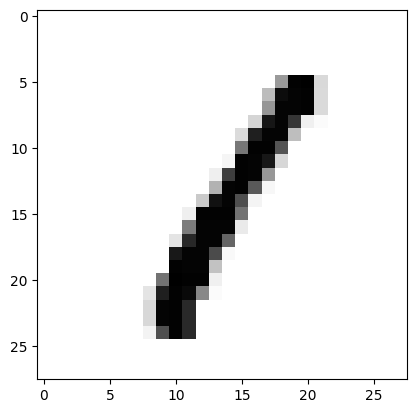

In [38]:
plt.imshow(x_train[3], cmap = 'Greys')
plt.show()

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_train= x_train/ 255.0
x_test = x_test.reshape((10000, 28, 28, 1))
x_test= x_test/ 255.0

In [46]:
def CNN():
    inputs = keras.Input(shape=(28, 28, 1), name='Input_layer')
    x = layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', name="conv_layer_1")(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2), name="pooling_1")(x)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), name="pooling_2")(x)
    x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units=64, activation='relu')(x)
    outputs = layers.Dense(units=10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='first_CNN_model')
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [47]:
model = CNN()
model.summary()


Model: "first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)          

In [28]:
np.floor(((28+0-3)/1)+1)

26.0

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelcheckpoint = ModelCheckpoint(filepath="first_CNN.h5", save_best_only=True, monitor="val_loss")

In [49]:
history = model.fit(x=x_train, y=y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=64, callbacks=[modelcheckpoint])

Epoch 1/10
938/938 [==============================] - 56s 59ms/step - loss: 0.1656 - accuracy: 0.9476 - val_loss: 0.0522 - val_accuracy: 0.9837
Epoch 2/10
  2/938 [..............................] - ETA: 56s - loss: 0.0117 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


938/938 [==============================] - 52s 55ms/step - loss: 0.0430 - accuracy: 0.9873 - val_loss: 0.0431 - val_accuracy: 0.9863
Epoch 3/10
938/938 [==============================] - 52s 56ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0267 - val_accuracy: 0.9921
Epoch 4/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0210 - accuracy: 0.9938 - val_loss: 0.0256 - val_accuracy: 0.9911
Epoch 5/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0165 - accuracy: 0.9952 - val_loss: 0.0494 - val_accuracy: 0.9864
Epoch 6/10
938/938 [==============================] - 52s 56ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0280 - val_accuracy: 0.9932
Epoch 7/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0360 - val_accuracy: 0.9918
Epoch 8/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0271 - val_accuracy: 0.9931
Epo

In [17]:
# Load the best model and evaluate
test_model = keras.models.load_model('first_CNN.h5')
test_model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 2.3010 - accuracy: 0.1135


[2.300964832305908, 0.11349999904632568]